# 年龄性别预测比赛
## 数据概览
### 训练数据 每个设备对应的性别、年龄段【deviceid_train.tsv】

In [1]:
class DeviceGenderAge():
    def __init__(self, device, gender, age):
        self.device = device
        self.gender = int(gender)
        self.age = int(age)
    def __str__(self):
        return "device: {0}, gender: {1}, age: {2}".format(self.device, self.gender, self.age)
device_gender_age_train_list = []
with open("Demo/deviceid_train.tsv", "r", encoding="utf-8") as f:
    for line in f.readlines():
        line = line.strip()
        items = line.split("\t")
        device = DeviceGenderAge(items[0], items[1], items[2])
        device_gender_age_train_list.append(device)

print("一个数据样例:")
print(device_gender_age_train_list[50])

一个数据样例:
device: 53bb60ec1eb01562b047ae6a56c0b943, gender: 1, age: 7


In [2]:
import matplotlib.pyplot as plt
print("训练集大小{}".format(len(device_gender_age_train_list)))

gender_map = {}
age_map = {}
for item in device_gender_age_train_list:
    gender_map[item.gender] = gender_map.get(item.gender, 0) + 1
    age_map[item.age] = age_map.get(item.age, 0) + 1
gender_list = sorted(gender_map.items(), key=lambda x: x[1], reverse=True)
age_list = sorted(age_map.items(), key=lambda x: x[1], reverse=True)
plt.bar(range(len(gender_list)), [x[1] for x in gender_list], tick_label = [x[0] for x in gender_list])
plt.title("gender distribution")
plt.show()
plt.bar(range(len(age_list)), [x[1] for x in age_list], tick_label = [x[0] for x in age_list])
plt.title("age distribution")
plt.show()

训练集大小50000


In [3]:
devices_in_traindata_set = set([x.device for x in device_gender_age_train_list])

### 设备数据 每个设备上的应用安装列表，设备应用名都进行了hash处理【deviceid_packages.tsv】

In [4]:
device_packages_map = {}
with open("Demo/deviceid_packages.tsv", "r", encoding="utf-8") as f:
    for line in f.readlines():
        line = line.strip()
        items = line.split("\t")
        device_packages_map[items[0]] = items[1].split(",")


#### 看看统计数据

In [5]:
import numpy as np

mean_app_per_device = np.mean([len(value) for key, value in device_packages_map.items()])
print("平均每个手机安装{}款app".format(mean_app_per_device))

平均每个手机安装10.528400731502742款app


In [6]:
app_set = set()
for value in device_packages_map.values():
    for item in value:
        app_set.add(item)
print("一共{}款不同的app".format(len(app_set)))

一共35000款不同的app


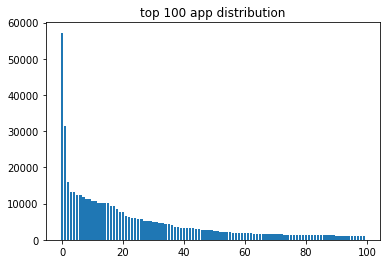

In [7]:
app_count_map = {}
for value in device_packages_map.values():
    for item in value:
        app_count_map[item] = app_count_map.get(item, 0) + 1
top_app = sorted(app_count_map.items(), key=lambda x: x[1], reverse=True)[:100]
plt.bar(range(len(top_app)), [x[1] for x in top_app])
plt.title("top 100 app distribution")
plt.show()

In [8]:
top_app_set = set([x[0] for x in top_app])

### 应用数据 每个设备上各个应用的打开、关闭行为数据【deviceid_package_start_close.tsv】

In [9]:
# 每台手机，各应用使用频次、时间统计
device_app_open_close_map = {}
class Container():
    def __init__(self):
        self.freq = 0
        self.time = 0
    def __str__(self):
        return "freq: {0}, time: {1}".format(self.freq, self.time)
with open("Demo/deviceid_package_start_close.tsv", "r", encoding="utf-8") as f:
    for line in f.readlines():
        items = line.strip().split("\t")
        if items[1] not in top_app_set:
            continue
        time_delta = (int(items[3]) - int(items[2])) // 1000
        
        device_app_open_close_map[items[0]] = device_app_open_close_map.get(items[0], {})
        device_app_open_close_map[items[0]][items[1]] = device_app_open_close_map[items[0]].get(items[1], Container())
        device_app_open_close_map[items[0]][items[1]].freq += 1
        device_app_open_close_map[items[0]][items[1]].time += time_delta


In [10]:
device_app_open_close_map["f39d80ff140836ed76b226ae3b23ada4"]["07e967d75aab2f6a52c558695a572a7c"].freq
device_app_open_close_map["f39d80ff140836ed76b226ae3b23ada4"]["07e967d75aab2f6a52c558695a572a7c"].time
print("随机抽取一个人，一个app，它的使用次数: {}，使用时间: {}"
      .format(
          device_app_open_close_map["f39d80ff140836ed76b226ae3b23ada4"]["07e967d75aab2f6a52c558695a572a7c"].freq,
          device_app_open_close_map["f39d80ff140836ed76b226ae3b23ada4"]["07e967d75aab2f6a52c558695a572a7c"].time))

随机抽取一个人，一个app，它的使用次数: 1，使用时间: 35


### 机型数据 每个设备的品牌和型号【deviceid_brand.tsv】

In [11]:
device_factory_model_map = {}
with open("Demo/deviceid_brand.tsv", "r", encoding="utf-8") as f:
    for line in f.readlines():
        line = line.strip()
        items = line.split()
        device_factory_model_map[items[0]] = (items[1], items[2])
        
print("某个人: {}的手机是: {}，型号是: {}".format(
    "f39d80ff140836ed76b226ae3b23ada4",
    device_factory_model_map["f39d80ff140836ed76b226ae3b23ada4"][0],
    device_factory_model_map["f39d80ff140836ed76b226ae3b23ada4"][1]
))
# 手机厂商_id映射
factory_id_map = {}
# 手机型号_id映射
model_id_map = {}
for key, value in enumerate(set([x[0] for x in device_factory_model_map.values()])):
    factory_id_map[value] = key
    
for key, value in enumerate(set([x[1] for x in device_factory_model_map.values()])):
    model_id_map[value] = key


某个人: f39d80ff140836ed76b226ae3b23ada4的手机是: samsung，型号是: GT-N7105


### APP数据 每个应用的类别信息【package_label.tsv】

In [12]:
app_info_map = {}
with open("Demo/package_label.tsv", "r", encoding="utf-8") as f:
    for line in f.readlines():
        line = line.strip()
        items = line.split()
        app_info_map[items[0]] = (items[1], items[2])
print("某app: {}是: {}类目中的: {}".format(
    "6b812b3636e43508a3db2a3537c9a654",
    app_info_map["6b812b3636e43508a3db2a3537c9a654"][0],
    app_info_map["6b812b3636e43508a3db2a3537c9a654"][1]
))

某app: 6b812b3636e43508a3db2a3537c9a654是: 体育类目中的: 体育资讯


## 准备训练数据
由于数据挺多，所以把训练数据输出至文件

In [13]:
def getAppInstallInfo(device):
    """
    返回top100款app的使用情况。
    如果没有安装，则返回[0, 0]
    如有安装，则返回[使用次数，平均时长]
    """
    appInstallInfo = device_app_open_close_map.get(device)
    if not appInstallInfo:
        return [0] * 200
    buffer = [0 for i in range(200)]
    index = 0
    for app in top_app_set:
        container = appInstallInfo.get(app)
        if container:
            buffer[index] = container.freq
            index += 1
            buffer[index] = container.time // container.freq
            index += 1
        else:
            index += 2
    return buffer

def getFactoryInfo(device):
    """
    返回手机厂商id和手机型号id
    如果没搜索到，则返回[-1, -1]
    """
    factoryInfo = device_factory_model_map.get(device)
    if not factoryInfo:
        return [-1, -1]
    return [factory_id_map.get(factoryInfo[0]), model_id_map.get(factoryInfo[1])]


with open("train.data", "w", encoding="utf-8") as f:
    f.write("gender,age," + ",".join([str(i) for i in range(202)])+ "\n")
    for person in device_gender_age_train_list:
        line = [person.gender, person.age]
        
        appInstallInfoList = getAppInstallInfo(person.device)
        line.extend(appInstallInfoList)
        
        factoryInfoList = getFactoryInfo(person.device)
        line.extend(factoryInfoList)
        
        f.write(",".join([str(x) for x in line]) + "\n")
        


## 准备预测数据

In [14]:
with open("Demo/deviceid_test.tsv", "r", encoding="utf-8") as fi:
    users = [x.strip() for x in fi.readlines()]
with open("test.data", "w", encoding="utf-8") as f:
    f.write(",".join([str(i) for i in range(202)]) + "\n")
    for device in users:
        line = []
        
        appInstallInfoList = getAppInstallInfo(device)
        line.extend(appInstallInfoList)
        
        factoryInfoList = getFactoryInfo(device)
        line.extend(factoryInfoList)
        f.write(",".join([str(x) for x in line]) + "\n")

## 训练模型

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [16]:
train_df = pd.read_csv("train.data")

In [17]:
y_gender = train_df["gender"]
y_age = train_df["age"]
train_df.drop(["gender", "age"], axis=1,inplace=True)

In [18]:
svc_age_model = LinearSVC()
svc_age_model.fit(train_df, y_age)
svc_age_model.score(train_df, y_age)

0.1537

In [19]:
svc_gender_model = LinearSVC()
svc_gender_model.fit(train_df, y_gender)
svc_gender_model.score(train_df, y_gender)

0.60684

## 预测模型

In [20]:
test_df = pd.read_csv("test.data")

In [21]:
predict_age = svc_age_model.predict(test_df)

In [22]:
predict_gender = svc_gender_model.predict(test_df)

In [23]:
predict_gender

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

## 输出结果

In [24]:
with open("Demo/deviceid_test.tsv", "r", encoding="utf-8") as fi:
    users = [x.strip() for x in fi.readlines()]
with open("result.csv", "w", encoding="utf-8") as f:
    f.write("DeviceID,1-0,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,2-0,2-1,2-2,2-3,2-4,2-5,2-6,2-7,2-8,2-9,2-10\n")
    for i in range(len(users)):
        predict = [0.0 for i in range(22)]
        gender = predict_gender[i]
        age = predict_age[i]
        predict[(gender-1) * 11 + age] = 1.0
        f.write(users[i]+"," + ",".join([str(x) for x in predict]) + "\n")
        

## 进阶
看到用线性svm，基于原始特征跑出来的结果很糟糕

### 标准化与分段 

可能是因为像[app使用次数][平均使用时间]这种特征，取值范围太大所导致。所以，这里分别试试标准化，和分段化，看看哪种效果更好。

In [64]:
train_df = pd.read_csv("train.data")
columns = ["{}".format(x) for x in range(0, 200)]
train_df[columns].describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,5.000000e+04,...,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,2.194880,2.996259e+04,3.115800,1.606632e+04,2.149520,4.979219e+02,0.222460,2.510243e+02,2.150220,8.430780e+03,...,0.333020,1.085992e+03,2.764120,1.443985e+03,0.132800,20.385640,0.747040,41.381520,1.09700,33.767880
std,14.165904,6.656184e+06,16.653375,3.329961e+06,16.782917,4.627877e+04,4.343366,2.092645e+04,12.896168,1.413125e+06,...,6.068704,2.068886e+05,35.379365,2.118614e+05,1.661535,1468.224252,14.166446,3387.596743,14.79173,1145.551965
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1208.000000,1.488368e+09,686.000000,7.442596e+08,880.000000,9.834381e+06,331.000000,3.793910e+06,761.000000,3.126343e+08,...,741.000000,4.617616e+07,4041.000000,4.414820e+07,125.000000,281076.000000,1044.000000,680099.000000,1040.00000,121854.000000


看一下上表，筛选出了奇数命名的列。它们是top100常用app中每个用户的平均使用时间。

均值较大，方差也大，先试试标准化

In [65]:
train_df[columns] = (train_df[columns] - train_df[columns].mean()) / train_df[columns].std()

In [66]:
train_df[columns].describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,2.803091e-17,1.101341e-18,-4.973799e-19,1.598721e-19,-1.293188e-17,-5.151435e-19,6.679102e-18,-8.881784e-19,2.188472e-17,4.440892e-19,...,-6.892265e-18,1.767475e-18,-8.455459e-18,3.552714e-18,0.000000,1.705303e-18,-5.151435e-18,-3.126388e-18,7.425172e-18,1.563194e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.549410e-01,-4.501467e-03,-1.870972e-01,-4.824778e-03,-1.280779e-01,-1.075919e-02,-5.121834e-02,-1.199555e-02,-1.667333e-01,-5.966053e-03,...,-5.487497e-02,-5.249162e-03,-7.812803e-02,-6.815703e-03,-0.079926,-1.388455e-02,-5.273306e-02,-1.221560e-02,-7.416306e-02,-2.947739e-02
25%,-1.549410e-01,-4.501467e-03,-1.870972e-01,-4.824778e-03,-1.280779e-01,-1.075919e-02,-5.121834e-02,-1.199555e-02,-1.667333e-01,-5.966053e-03,...,-5.487497e-02,-5.249162e-03,-7.812803e-02,-6.815703e-03,-0.079926,-1.388455e-02,-5.273306e-02,-1.221560e-02,-7.416306e-02,-2.947739e-02
50%,-1.549410e-01,-4.501467e-03,-1.870972e-01,-4.824778e-03,-1.280779e-01,-1.075919e-02,-5.121834e-02,-1.199555e-02,-1.667333e-01,-5.966053e-03,...,-5.487497e-02,-5.249162e-03,-7.812803e-02,-6.815703e-03,-0.079926,-1.388455e-02,-5.273306e-02,-1.221560e-02,-7.416306e-02,-2.947739e-02
75%,-1.549410e-01,-4.501467e-03,-1.870972e-01,-4.824778e-03,-1.280779e-01,-1.075919e-02,-5.121834e-02,-1.199555e-02,-1.667333e-01,-5.966053e-03,...,-5.487497e-02,-5.249162e-03,-7.812803e-02,-6.815703e-03,-0.079926,-1.388455e-02,-5.273306e-02,-1.221560e-02,-7.416306e-02,-2.947739e-02
max,8.512024e+01,2.236022e+02,4.100575e+01,2.234992e+02,5.230619e+01,2.124923e+02,7.615696e+01,1.812853e+02,5.884305e+01,2.212301e+02,...,1.220470e+02,2.231881e+02,1.141410e+02,2.083756e+02,75.151701,1.914255e+02,7.364253e+01,2.007493e+02,7.023539e+01,1.063420e+02


In [67]:
y_gender = train_df["gender"]
y_age = train_df["age"]
train_df.drop(["gender", "age"], axis=1,inplace=True)

svc_age_model = LinearSVC()
svc_age_model.fit(train_df, y_age)
svc_age_model.score(train_df, y_age)

0.15732

提升不是很明显，下面再试试分段

In [97]:
train_df = pd.read_csv("train.data")
columns = ["{}".format(x) for x in range(0, 200)]
train_df[columns] = train_df[columns].apply(lambda x: pd.cut(x, 10, labels=False))

In [99]:
y_gender = train_df["gender"]
y_age = train_df["age"]
train_df.drop(["gender", "age"], axis=1,inplace=True)

svc_age_model = LinearSVC()
svc_age_model.fit(train_df, y_age)
svc_age_model.score(train_df, y_age)

0.11014

效果更不好。看了下数据分布，的确不适用于分段

### 引入新的特征
从上面的结果看出，是预测年龄拖了后腿。

所以试试把app类型加入进来。